<a href="https://colab.research.google.com/github/rishigarg0709/Data-Science/blob/master/pokemon_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
file=files.upload()

Saving Images.zip to Images.zip
Saving Images_test.zip to Images_test.zip
Saving Sample_submission.csv to Sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
from keras.layers import *
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing import image

In [10]:
!unzip Images.zip

Archive:  Images.zip
  inflating: Images/296.jpg          
  inflating: Images/297.jpg          
  inflating: Images/298.jpg          
  inflating: Images/299.jpg          
  inflating: Images/300.jpg          
  inflating: Images/301.jpg          
  inflating: Images/302.jpg          
  inflating: Images/303.jpg          
  inflating: Images/304.jpg          
  inflating: Images/305.jpg          
  inflating: Images/306.jpg          
  inflating: Images/307.jpg          
  inflating: Images/308.jpg          
  inflating: Images/309.jpg          
  inflating: Images/310.jpg          
  inflating: Images/311.jpg          
  inflating: Images/312.jpg          
  inflating: Images/313.jpg          
  inflating: Images/314.jpg          
  inflating: Images/315.jpg          
  inflating: Images/316.jpg          
  inflating: Images/317.jpg          
  inflating: Images/318.jpg          
  inflating: Images/319.jpg          
  inflating: Images/320.jpg          
  inflating: Images/321.jpg  

In [12]:
!unzip Images_test.zip

Archive:  Images_test.zip
  inflating: Images_test/1100.jpg    
  inflating: Images_test/1101.jpg    
  inflating: Images_test/1102.jpg    
  inflating: Images_test/1103.jpg    
  inflating: Images_test/1104.jpg    
  inflating: Images_test/1105.jpg    
  inflating: Images_test/1106.jpg    
  inflating: Images_test/1107.jpg    
  inflating: Images_test/1108.jpg    
  inflating: Images_test/1109.jpg    
  inflating: Images_test/1110.jpg    
  inflating: Images_test/1111.jpg    
  inflating: Images_test/1112.jpg    
  inflating: Images_test/1113.jpg    
  inflating: Images_test/1114.jpg    
  inflating: Images_test/1115.jpg    
  inflating: Images_test/1116.jpg    
  inflating: Images_test/1117.jpg    
  inflating: Images_test/1118.jpg    
  inflating: Images_test/1119.jpg    
  inflating: Images_test/1120.jpg    
  inflating: Images_test/1121.jpg    
  inflating: Images_test/1122.jpg    
  inflating: Images_test/1123.jpg    
  inflating: Images_test/1124.jpg    
  inflating: Images_test

In [13]:
!ls

Images	     Images_test.zip  sample_data	     test.csv
Images_test  Images.zip       Sample_submission.csv  train.csv


In [0]:
import os
folder=os.listdir('Images')

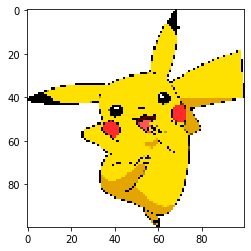

In [18]:
import matplotlib.pyplot as pl


img=image.load_img("Images/393.jpg",target_size=(100,100))
X=image.img_to_array(img)/255.0
plt.imshow(X)

In [0]:
import csv
with open('train.csv', mode='r') as infile:
    reader = csv.reader(infile)
    with open('coors_new.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        mydict = {rows[0]:rows[1] for rows in reader}

In [36]:
print(mydict['296.jpg'])

Pikachu


In [0]:
image_data=[]
labels=[]

label_id={
    'Pikachu':0,
    'Bulbasaur' : 1,
    'Charmander' : 2
}

In [40]:
import os
cnt=0
for f in folder:
  path="Images/"+f
  img=image.load_img(os.path.join("Images",f),target_size=(100,100))
  X=image.img_to_array(img)/255.0
  image_data.append(X)
  labels.append(label_id[mydict[f]])

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [0]:
import numpy as np
X_train=np.array(image_data)
Y_train=np.array(labels)

In [43]:
print(X_train.shape,Y_train.shape)

(304, 100, 100, 3) (304,)


In [0]:
from keras.utils import np_utils
Y_train=np_utils.to_categorical(Y_train)

In [45]:
print(X_train.shape,Y_train.shape)

(304, 100, 100, 3) (304, 3)


In [51]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)             

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
hist=model.fit(X_train,Y_train,epochs=12,validation_split=0.1,batch_size=16)

Train on 273 samples, validate on 31 samples
Epoch 1/12
273/273 [==============================] - 1s 3ms/step - loss: 0.8262 - acc: 0.6227 - val_loss: 0.7453 - val_acc: 0.6774
Epoch 2/12
273/273 [==============================] - 0s 1ms/step - loss: 0.3585 - acc: 0.8278 - val_loss: 0.4503 - val_acc: 0.8065
Epoch 3/12
273/273 [==============================] - 0s 1ms/step - loss: 0.2071 - acc: 0.9341 - val_loss: 0.4308 - val_acc: 0.8065
Epoch 4/12
273/273 [==============================] - 0s 1ms/step - loss: 0.1838 - acc: 0.9341 - val_loss: 0.2515 - val_acc: 0.8710
Epoch 5/12
273/273 [==============================] - 0s 1ms/step - loss: 0.3445 - acc: 0.8718 - val_loss: 0.3583 - val_acc: 0.8387
Epoch 6/12
273/273 [==============================] - 0s 1ms/step - loss: 0.2400 - acc: 0.9341 - val_loss: 0.4508 - val_acc: 0.8387
Epoch 7/12
273/273 [==============================] - 0s 1ms/step - loss: 0.0848 - acc: 0.9780 - val_loss: 0.7861 - val_acc: 0.7097
Epoch 8/12
273/273 [===========

In [0]:
testfolder=os.listdir('Images_test')

In [0]:
test_data=[]

In [0]:
for f in testfolder:
  img=image.load_img(os.path.join("Images_test",f),target_size=(100,100))
  X=image.img_to_array(img)/255.0
  test_data.append(X)

In [60]:
X_test=np.array(test_data)
print(X_test.shape)

(123, 100, 100, 3)


In [0]:
Y_test=model.predict(X_test)

In [63]:
print(Y_test.shape)

(123, 3)


In [64]:
print(Y_test[0])

[9.9269426e-01 8.0876889e-05 7.2249006e-03]


In [0]:
ans=[]
for i in range(Y_test.shape[0]):
  ans.append(np.argmax(Y_test[i]))


In [74]:
print(ans)

[0, 2, 1, 1, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0]


In [0]:
headers=[]
for f in testfolder:
  headers.append(f)

In [71]:
model.evaluate(X_test,Y_test)

123/123 [==============================] - 0s 376us/step


[0.06586342856166809, 1.0]

In [0]:
import pandas as pd
dict={"ImageId" : headers , "NameOfPokemon" : ans }
df = pd.DataFrame(dict)  
df.to_csv('predict_pokemon.csv',index_label=None,index=False)

In [77]:
!ls

coors_new.csv  Images_test.zip	    sample_data		   train.csv
Images	       Images.zip	    Sample_submission.csv
Images_test    predict_pokemon.csv  test.csv


In [78]:
files.download('predict_pokemon.csv')

MessageError: ignored

In [79]:
df=pd.read_csv('predict_pokemon.csv')
df.head(n=10)

,ImageId,NameOfPokemon
0,2013.jpg,0
1,2228.jpg,2
2,1124.jpg,1
3,1122.jpg,1
4,2019.jpg,0
5,1104.jpg,1
6,1108.jpg,1
7,2224.jpg,2
8,1131.jpg,1
9,2216.jpg,2


In [0]:
rev_label_id={
    0:'Pikachu',
    1: 'Bulbasaur',
    2: 'Charmander'
}

for i in range(len(ans)):
  ans[i]=rev_label_id[ans[i]]

In [83]:
print(ans)

['Pikachu', 'Charmander', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Charmander', 'Pikachu', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Charmander', 'Pikachu', 'Charmander', 'Pikachu', 'Bulbasaur', 'Pikachu', 'Charmander', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Charmander', 'Pikachu', 'Charmander', 'Bulbasaur', 'Pikachu', 'Charmander', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Charmander', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Charmander', 'Bulbasaur', 'Charmander', 'Pikachu', 'Pikachu', 'Charmander', 'Charmander', 'Pikachu', 'Charmande

In [0]:
import pandas as pd
dict={"ImageId" : headers , "NameOfPokemon" : ans }
df = pd.DataFrame(dict)  
df.to_csv('predict_pokemon_final.csv',index_label=None,index=False)

In [0]:
import csv
with open('predict_pokemon_final.csv', mode='r') as infile:
    reader = csv.reader(infile)
    with open('coors_new.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        finaldict = {rows[0]:rows[1] for rows in reader}

In [122]:
dfxtest=pd.read_csv("test.csv")
x_=dfxtest.values
print(x_.shape)

(123, 1)


In [123]:
print(x_.shape)
print(type(x_))

(123, 1)
<class 'numpy.ndarray'>


In [124]:
fans2=[]
x_=x_[:,0]
for i in x_:
  print(i)
  fans2.append(finaldict[i])


1106.jpg
2236.jpg
1131.jpg
2221.jpg
2011.jpg
2030.jpg
2035.jpg
1110.jpg
1104.jpg
2217.jpg
1111.jpg
1100.jpg
1112.jpg
1138.jpg
2238.jpg
2009.jpg
2225.jpg
2240.jpg
2020.jpg
2209.jpg
2029.jpg
1114.jpg
2201.jpg
1118.jpg
2025.jpg
2202.jpg
1117.jpg
1119.jpg
2000.jpg
2007.jpg
2039.jpg
2017.jpg
2215.jpg
1120.jpg
2006.jpg
1116.jpg
1128.jpg
1125.jpg
2203.jpg
1133.jpg
1137.jpg
2220.jpg
2012.jpg
2224.jpg
2206.jpg
1122.jpg
2223.jpg
1102.jpg
2234.jpg
2216.jpg
2016.jpg
2227.jpg
2013.jpg
1113.jpg
2204.jpg
1101.jpg
2208.jpg
2024.jpg
2031.jpg
2222.jpg
2211.jpg
2033.jpg
2213.jpg
2231.jpg
2001.jpg
2040.jpg
1127.jpg
2023.jpg
2015.jpg
1121.jpg
2232.jpg
1139.jpg
1103.jpg
2018.jpg
2233.jpg
2212.jpg
2210.jpg
2228.jpg
2026.jpg
1132.jpg
2003.jpg
1129.jpg
2214.jpg
1123.jpg
2004.jpg
1136.jpg
1140.jpg
2226.jpg
2230.jpg
1135.jpg
1105.jpg
2237.jpg
1109.jpg
2022.jpg
2005.jpg
2218.jpg
2036.jpg
1115.jpg
2032.jpg
2200.jpg
1134.jpg
1130.jpg
1107.jpg
2034.jpg
2205.jpg
2008.jpg
2027.jpg
2028.jpg
2239.jpg
1108.jpg
2010.jpg
2

In [126]:
print(fans2)

['Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Pikachu', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Charmander', 'Pikachu', 'Charmander', 'Pikachu', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Pikachu', 'Charmander', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Charmander', 'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Bulbasaur', 'Charmander', 'Pikachu', 'Charmander', 'Charmander', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Charmander', 'Pikachu', 'Charmander', 'Pikachu', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Pikachu', 'Pikachu', 'Charmander', 'Charmander', 'Pikachu', 'Charmander', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Charmander', 'Pikachu', 'Bulbasaur', 'Pikachu', 'Charmander', 'Charmander', 'Charmander', 'Charmander', 'Pi

In [0]:
import pandas as pd
dict={"ImageId" : x_ , "NameOfPokemon" : fans2 }
df = pd.DataFrame(dict)  
df.to_csv('predict_pokemon_final2.csv',index_label=None,index=False)